In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn

seaborn.set()
%matplotlib inline

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")
del data["Channel"]
del data["Region"]
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


Sem muito segredo até aqui:
- Lendo os dados de https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
- Removendo "Channel" e "Region" pois nao vao fazer sentido para o que estamos fazendo
- dando uma olhada nos dados

In [2]:
data.describe().round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


Fazendo um loop para avaliar o impacto do número de cluster no valor do momento de inércia

In [3]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1234)
    kmeans.fit(data.values)
    inertia.append((i,kmeans.inertia_,))

Plotando o resultado. Aqui não eh tão claro, mas 5 me parece ser um nuúmero honesto de clusters para usarmos

Text(0,0.5,'Inércia total')

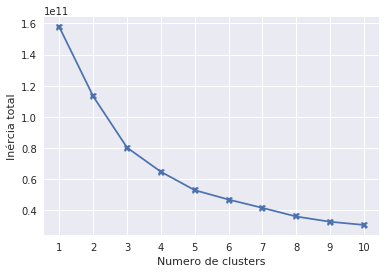

In [4]:
#plt.figure(figsize=(10,10))
plt.plot([w[0] for w in inertia],[w[1] for w in inertia], marker="X")
plt.xticks([w[0] for w in inertia])
plt.xlabel("Numero de clusters")
plt.ylabel("Inércia total")

Aplicando o k-means com k=5

In [5]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=1234)
kmeans.fit(data)
cluster_list = kmeans.labels_

plotando os resultados

Text(0.5,1,'Gastos por cluster')

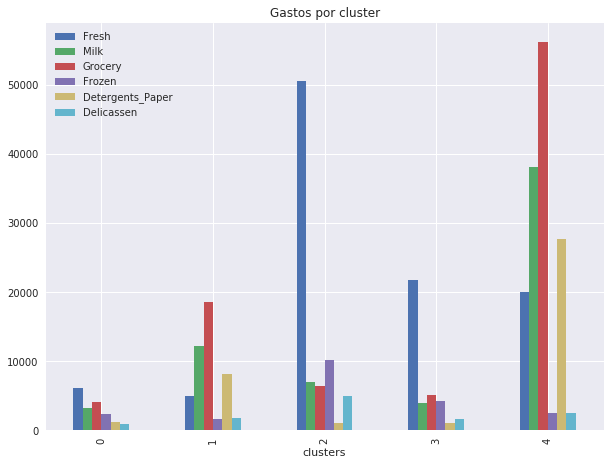

In [6]:
data["clusters"] = cluster_list
data.groupby("clusters").aggregate("mean").plot.bar(figsize=(10,7.5))
plt.title("Gastos por cluster")